# Задание 7 Jupiter

## Подготовка данных

### 1. Загружаем датасет Титаник с файлами train.csv и test.csv как pandas.DataFrame

In [4]:
import pandas as pd
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

display(test_df.head())
display(train_df.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Конкатенируем данные в один DataFrame по ключу PassengerID

In [5]:
df = pd.concat([train_df, test_df], ignore_index=True)
for col in ['Survived', 'Pclass', 'Sex']:
    df[col] = df[col].astype('category')

display(df)
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 75.8+ KB


None

- Отсутствующие данные Nan
- Все столбцы корректных типов
- Выживание, класс и пол категориальные

## Анализ таблицы

### 1. Визуализируем базовую статистику таблицы

In [6]:
print(df.describe(include='all'))

max_pass = df['Pclass'].value_counts().idxmax()
print(f'\nВ классе {max_pass} наибольшее количество пассажиров')

        PassengerId  Survived  Pclass                  Name   Sex  \
count   1309.000000     891.0  1309.0                  1309  1309   
unique          NaN       2.0     3.0                  1307     2   
top             NaN       0.0     3.0  Connolly, Miss. Kate  male   
freq            NaN     549.0   709.0                     2   843   
mean     655.000000       NaN     NaN                   NaN   NaN   
std      378.020061       NaN     NaN                   NaN   NaN   
min        1.000000       NaN     NaN                   NaN   NaN   
25%      328.000000       NaN     NaN                   NaN   NaN   
50%      655.000000       NaN     NaN                   NaN   NaN   
75%      982.000000       NaN     NaN                   NaN   NaN   
max     1309.000000       NaN     NaN                   NaN   NaN   

                Age        SibSp        Parch    Ticket         Fare  \
count   1046.000000  1309.000000  1309.000000      1309  1308.000000   
unique          NaN        

### В каком классе было больше всего пассажиров?
Ответ: 3

### 2. Группируем таблицу в два уровня: класс и пол, по среднему значению возраста

In [7]:
# group by class and sex
# count mean age
grouped = df.groupby(['Pclass', 'Sex'], observed=False)['Age'].mean()

display(grouped)

# find age gap
youngest = grouped.idxmin()
oldest = grouped.idxmax()
age_gap = grouped.max() - grouped.min()

print(f'Самая юный - класс {youngest[0]}, {youngest[1]} со средним возрастом {grouped.min():.2f}')
print(f'Самая взрослый - класс {oldest[0]}, {oldest[1]} со средним возрастом {grouped.max():.2f}')
print(f'Разница в возрасте - {age_gap:.2f}')

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

Самая юный - класс 3, female со средним возрастом 22.19
Самая взрослый - класс 1, male со средним возрастом 41.03
Разница в возрасте - 18.84


### Кто из возможных комбинаций самый юный, кто самый взрослый?
Ответ: Самый юный - класс 3, female со средним возрастом 22.19,
        
        самый взрослый - класс 1, male со средним возрастом 41.03
### Насколько отличаются эти значения?
Ответ: Разница в возрасте - 18.84

### 3. Отбираем только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировываем их по убыванию стоимости билета

In [8]:
#  select the survivors with the last name on "K"
survivors_K = df[(df['Survived'] == 1) & (df['Name'].str.startswith('K'))]

# sort by descending ticket price
sorted_survivors = survivors_K.sort_values(by='Fare', ascending=False)

display(sorted_survivors.head())

# find the most expensive and cheapest ticket
most_expensive = sorted_survivors.iloc[0]
cheapest = sorted_survivors.iloc[-1]

print(f'Самый дорогой билет - {most_expensive["Fare"]}    у пассажира - {most_expensive["Name"]}')
print(f'Самый дешевый билет - {cheapest["Fare"]}    у пассажира {cheapest["Name"]}')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1.0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
316,317,1.0,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
184,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S


Самый дорогой билет - 52.5542    у пассажира - Kimball, Mr. Edwin Nelson Jr
Самый дешевый билет - 7.75    у пассажира Kelly, Miss. Mary


### Кто заплатил больше всех? Кто меньше всех?
Ответ: Kimball, Mr. Edwin Nelson Jr заплатил больше всех (52.5542),

        Kelly, Miss. Mary заплатила меньше всех (7.75)

In [9]:
# the max number of relatives
df['Relatives'] = df['SibSp'] + df['Parch']
idx_max_relatives = df[df['Survived'] == 1]['Relatives'].idxmax()

print(f"\nУ выжившего пассажира {df.iloc[idx_max_relatives]['Name']} "
      f"было максимальное количество родных - {df.iloc[idx_max_relatives]['Relatives']}")


У выжившего пассажира Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) было максимальное количество родных - 6


### 4. Какое максимальное количество родных было с выжившим пассажиром?
Ответ: 6

### 5. Считаем среднюю стоимость билета пассажиров, для которых указана каюта (Cabin) и для тех, у кого она не указана

In [10]:
# count mean cost and difference
mean_with_cabins = df[df['Cabin'].notna()]['Fare'].mean()
mean_without_cabins = df[df['Cabin'].isna()]['Fare'].mean()
diff = mean_with_cabins/mean_without_cabins
print(f"Средняя стоимость билета пассажиров с каютой: {mean_with_cabins:.2f}")
print(f"Средняя стоимость билета пассажиров без каюты: {mean_without_cabins:.2f}")
print(f"Стоимость отличается в {diff:.2f} раз")

Средняя стоимость билета пассажиров с каютой: 81.93
Средняя стоимость билета пассажиров без каюты: 19.13
Стоимость отличается в 4.28 раз


Средняя стоимость билета пассажиров с каютой: 81.93

Средняя стоимость билета пассажиров без каюты: 19.13
### Во сколько раз они отличаются?
Ответ: В 4.28 раз

## Визуализация

### Импортируем необходимые библиотеки

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<class 'ModuleNotFoundError'>: No module named 'seaborn'

### Отображение графиков:
1. Scatter plot
2. Linear plot (with several lines)
3. Histogram
4. Bar chart
5. Horizontal bar chart
6. Pie chart
7. Box chart
8. Sunburst chart
9. Sankey diagram

### 1. Scatter plot
   **Интерактивная** диаграмма показывает рассеяния стоимости билета в зависимости от возраста пассажиров. Цвет точек указывает на то, выжили пассажиры или нет.

In [12]:
fig = px.scatter(df, x="Age", y="Fare", color="Survived",
                 title="Age and ticket price depending on survival")
fig.show()

<class 'NameError'>: name 'px' is not defined

### 2. Linear Plot with Multiple Lines
   **Интерактивный** линейный график показывает изменение средней стоимости билета в зависимости от возраста для каждого класса пассажиров.

In [13]:
sns.lineplot(x="Age", y="Fare", hue="Pclass", data=df)
plt.title("Ticket price in different age groups and classes")
plt.show()

<class 'NameError'>: name 'sns' is not defined

### 3. Histogram
    Гистограмма показывает распределение возрастов всех пассажиров

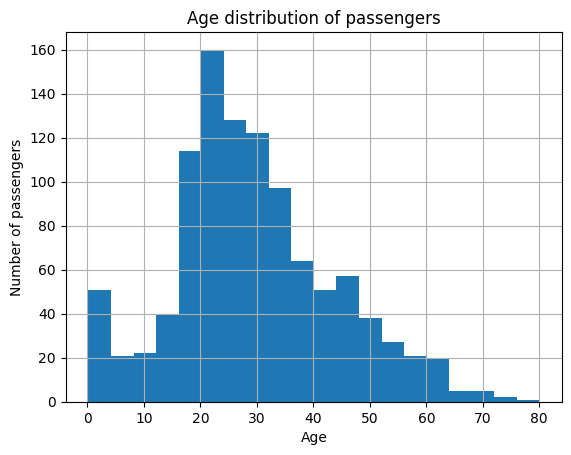

In [14]:
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.title("Age distribution of passengers")
plt.grid(True)
plt.show()

### 4. Bar Chart
  **Интерактивная** столбчатая диаграмма показывает среднюю стоимость билета для каждого класса пассажиров.

In [15]:
bar_chart_data = df.groupby(["Pclass"])["PassengerId"].count().reset_index(name="Count")
fig = px.bar(bar_chart_data, x="Pclass", y="Count", title="Количество пассажиров по классам")
fig.show()

<ipython-input-15-924584d24a2c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_chart_data = df.groupby(["Pclass"])["PassengerId"].count().reset_index(name="Count")


<class 'NameError'>: name 'px' is not defined

### 5. Horizontal bar chart
  Столбчатая перевернутая диаграмма показывает количество пассажиров, которые отправились с каждого порта посадки («Southampton», «Cherbourg» и «Queenstown»).

In [16]:
df1 = df.groupby("Embarked").size().reset_index(name="counts")
sns.barplot(y="Embarked", x="counts", data=df1, orient="h")
plt.title("Number of passengers at the port of embarkation")
plt.show()

<class 'NameError'>: name 'sns' is not defined

### 6. Pie chart
    Круговая диаграмма процентное соотношение выживших и погибших пассажиров.

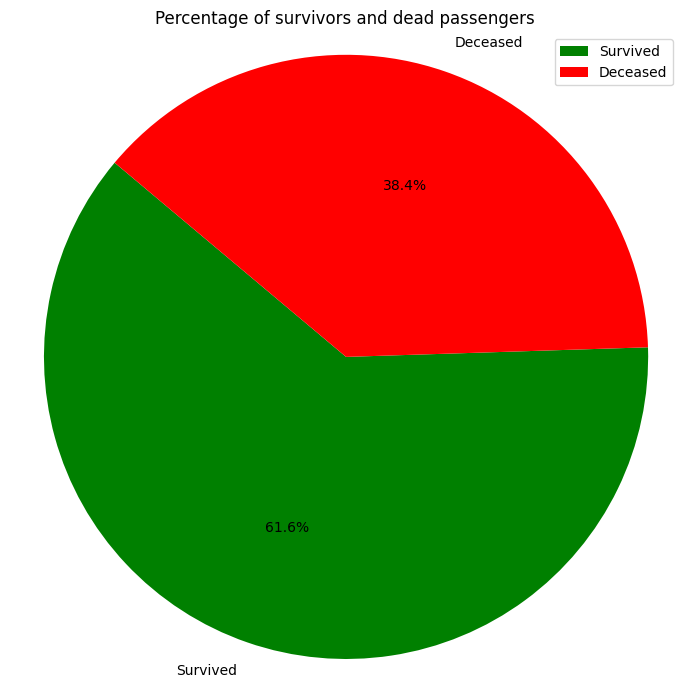

In [17]:
labels = ["Survived", "Deceased"]
values = df["Survived"].value_counts()
colors = ["green", "red"]

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
ax.axis("equal")
plt.title("Percentage of survivors and dead passengers")
plt.legend(labels, loc="upper right")
plt.tight_layout()
plt.show()

### 7. Box chart
     Диаграмма демонстрирует разброс значений возраста для каждого пассажирского класса.

In [18]:
box_data = sns.boxplot(x="Pclass", y="Age", data=df)
box_data.set_title("The range of ticket prices by class")

<class 'NameError'>: name 'sns' is not defined

### 8. Sunburst chart
   **Интерактивный** график показывает распределение по возрасту, разделенному по классу и полу.

In [19]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

age_bins = [-1, 17, 24, 34, 44, 200]
age_labels = ["<18", "18-24", "25-34", "35-44", "45+"]
df["AgeGroup"] = pd.cut(df["Age"], age_bins, labels=age_labels)

fig = px.sunburst(
    data_frame=df,
    path=["Sex", "Pclass", "AgeGroup"],
    values="Age",
    color="Pclass"
)

fig.show()

<class 'NameError'>: name 'px' is not defined

### 9. KDE diagram
   Диаграмма показывает  распределение возраста пассажиров по классу и полу, а также их связь со стоимостью билета и статусом выживания.

In [20]:
sns.kdeplot(x="Age", y="Fare", hue="Survived", fill=True, levels=10, thresh=0.05, alpha=.8, data=df)

plt.title('Age distribution of passengers by class and gender')
plt.xlabel('Age')
plt.ylabel('Ticket cost')
plt.show()

<class 'NameError'>: name 'sns' is not defined

### 10. 3D scatter plot
   Трёхмерная диаграмма рассеяния (**интерактивная**), показывающая возраст, стоимость билета и количество родственников, окрашенная в зависимости от статуса выживания и пола.

In [21]:
fig = px.scatter_3d(df, x='Age', y='Fare', z='Parch', color='Sex',
                    symbol='Survived', size_max=18, title='3D passenger distribution')
fig.show()

<class 'NameError'>: name 'px' is not defined

## Доп

In [22]:
sankey_data = df.groupby(["Pclass","Sex","Survived"])[["PassengerId"]].count().reset_index()

labels = []
for index, row in sankey_data.iterrows():
    labels.extend([f"{row['Pclass']} class", f"{row['Sex']}", f"Survival: {row['Survived']}"])

source = []
target = []
value = []

for i in range(len(labels)):
    if i % 3 == 0:
        source.append(i)
        target.append(i+1)
        value.append(sankey_data.iloc[i//3]["PassengerId"])
    elif i % 3 == 1:
        source.append(i)
        target.append(i+1)
        value.append(sankey_data.iloc[(i-1)//3]["PassengerId"])

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Interactive Sankey Plot: Pclass, Sex and Survival",
                  font_size=15)
fig.show()

<ipython-input-22-414f93991d98>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sankey_data = df.groupby(["Pclass","Sex","Survived"])[["PassengerId"]].count().reset_index()


<class 'NameError'>: name 'go' is not defined